In [1]:
import numpy as np
import pandas as pd

In [3]:
dingling=pd.read_csv("dingling.csv")

# Data analysis

In [4]:
dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [5]:
dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

#Setting default figure size
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False

In [12]:
dingling.index=pd.to_datetime(dingling[['year','month','day','hour']])

print('Start:',dingling.index[0],'\nEnd:',dingling.index[-1])

Start: 2013-03-01 00:00:00 
End: 2017-02-28 23:00:00


In [16]:
dingling.PM10.describe()

count    34408.000000
mean        83.739723
std         79.541685
min          2.000000
25%         26.000000
50%         60.000000
75%        117.000000
max        905.000000
Name: PM10, dtype: float64

From above data, it is clear that the range is large with min at 2microgram per cubic mm and max at 905 microgram per cubic mm

## Finding missing values


In [18]:
dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Realistically, the ability to respond to hourly updates and affet meaningful change is low. In order to enact better pollution controls through the results of the data, the dataset should be adjusted to a timescale more amenable to human reaction. So a weekly average would be a better measure than an hourly data.

### Converting frequency to weeks

In [19]:
dingling_week = dingling.resample('W').mean()

print('Week frequency shape: ',dingling_week.shape)

Week frequency shape:  (210, 16)


C:\Users\user\AppData\Local\Temp\ipykernel_15068\757507412.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dingling_week = dingling.resample('W').mean()


In [20]:
#Find the missing values of PM10 in the weekly dataset

dingling_week.isna().sum()['PM10']

0

There are no missing values in weekly observations of the dataset

# Visualizing trends and repeating variations

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'PM10 concentration'),
 Text(0.5, 1.0, 'Dingling Air Quality: PM10 concentration from 2013-2017')]

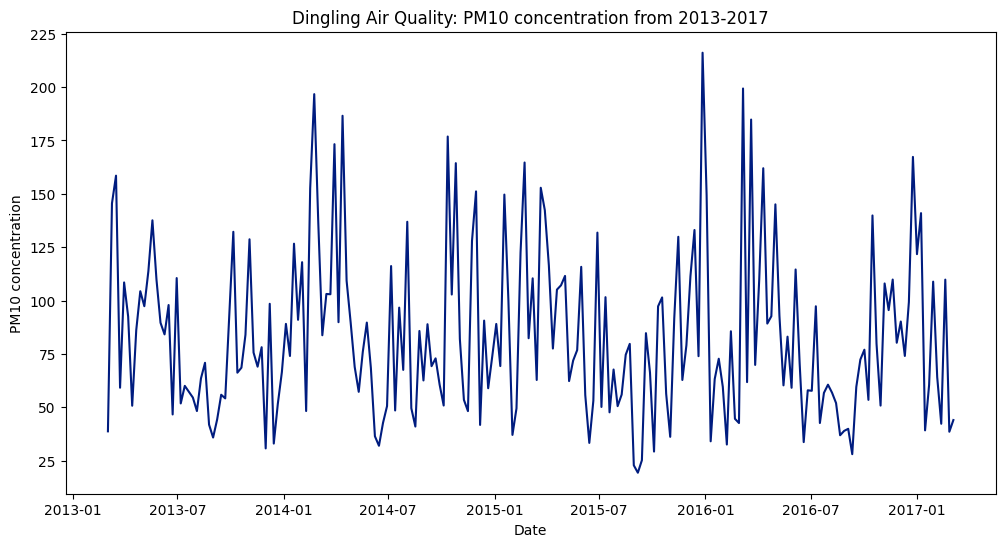

In [46]:
#Visualizing PM concentration levels against time

fig=sns.lineplot(data=dingling_week.PM10)
fig.set( xlabel = "Date", ylabel = "PM10 concentration",title='Dingling Air Quality: PM10 concentration from 2013-2017')

Observations:

• There are no obvious patterns in the time series plot. 

• Most of the movement seems random.

• There may be a seasonal variation. 

For a better visualization, we should find patterns within the data using the seasonal_decompose() method from the statsmodels package

C:\Users\user\AppData\Local\Temp\ipykernel_15068\2234528137.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


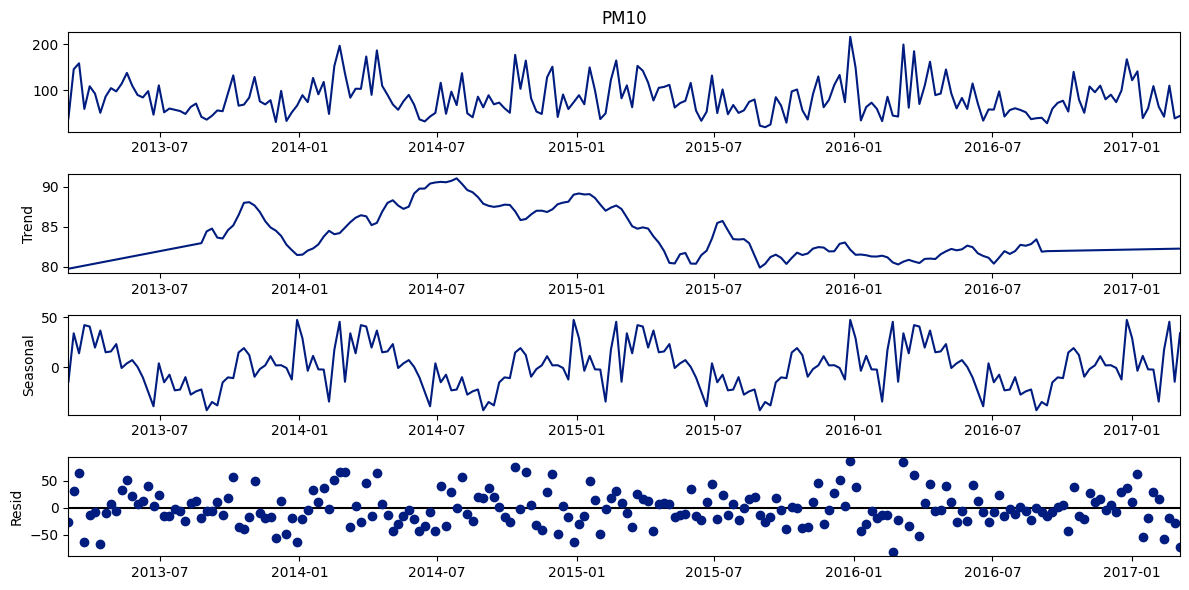

In [47]:
#Time series decomposition

import statsmodels.api as sm

plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.figsize']=(12,6)

decomposition = sm.tsa.seasonal_decompose(dingling_week.PM10, model='additive', extrapolate_trend='freq')
fig = decomposition.plot()


• The observed plot shows the average weekly PM10 values.

• The Trend plot shows that there is an overall increasing trend since value starts at around 80 and ends around 85.

• The seasonal plot identifies repeating patterns that reach their lowest value about 80% of the way through each year. 



# Series stationarity

A stationary process has a mean, variance and autocorrelation structure that do not change over time. Stationarity is an assumption made by many time series analysis techniques. The augmented Dickey-Fuller test is used to check for stationarity. It has a null hypothesis that a problematic feature is present in the process (non-stationary). The alternative hypothesis is that the problematic feature is absent and the process is stationary.

In [49]:
# Look at the stationarity of the data using Dicky Fuller test

from statsmodels.tsa.stattools import adfuller

dingling_aft = adfuller(dingling_week.PM10, autolag='AIC')

output = pd.Series(dingling_aft[0:4],index=['test statistic', 'pvalue', 'number of lags used', 'number of observations'])
output

test statistic             -3.978433
pvalue                      0.001528
number of lags used        14.000000
number of observations    195.000000
dtype: float64

The p-value for the air quality data is less than the significance level of 0.05. The null hypothesis is rejected in favor of the alternative hypothesis which states that the dataset is stationary and its time series properties are constant over time.

# Splitting data into training and testing sets

In [53]:
# train-test split
pct_train = 0.80
split_week_idx = round(len(dingling_week) * pct_train)
train_wk, test_wk = dingling_week[:split_week_idx], dingling_week[split_week_idx:]

# Correlation coefficients

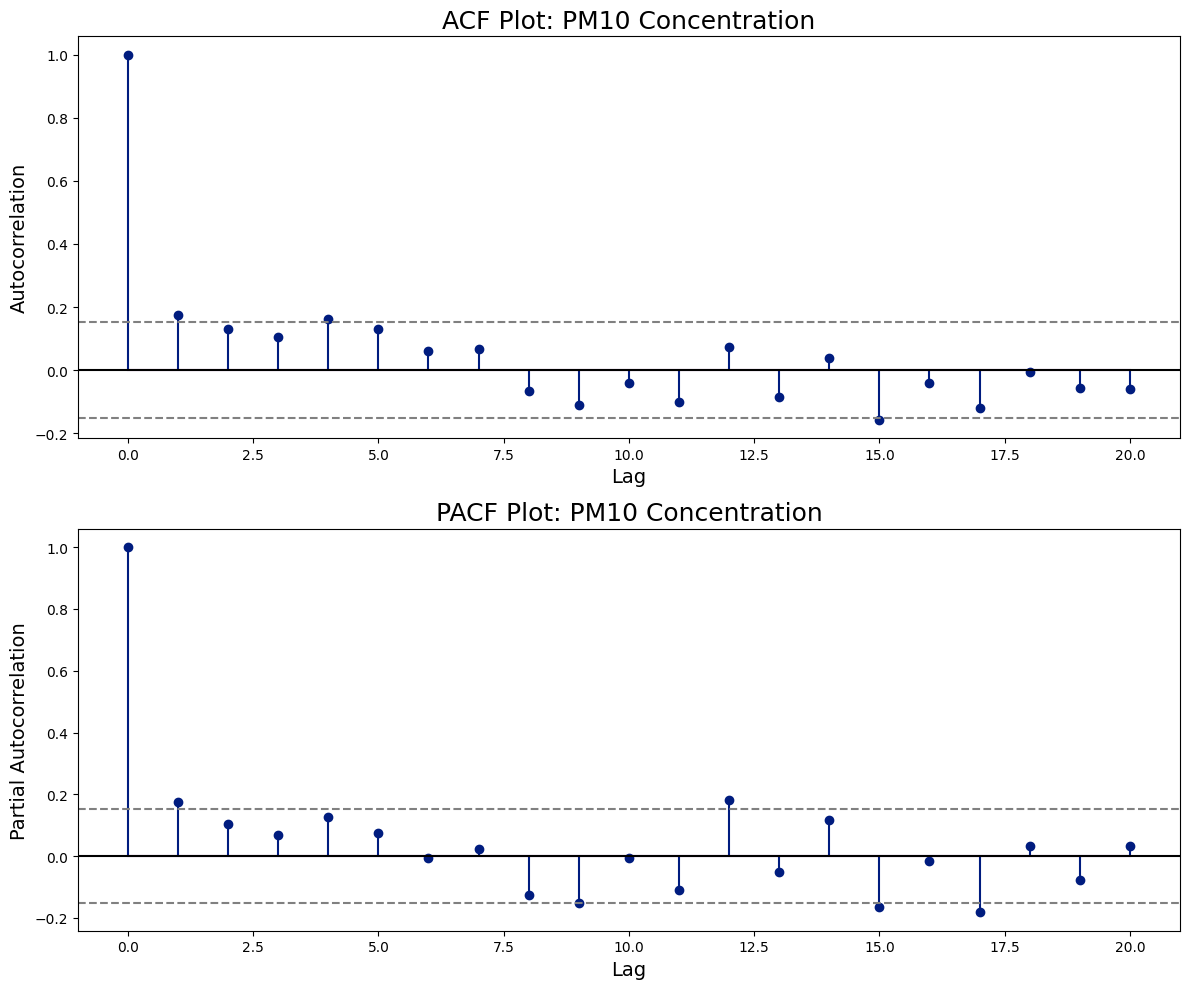

In [54]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# ACF
lag_acf = acf(train_wk.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.title('ACF Plot: PM10 Concentration', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)

# PACF
lag_pacf = pacf(train_wk.PM10, nlags=20, method='ols')

plt.subplot(212)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.title('PACF Plot: PM10 Concentration', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)

plt.tight_layout();